# さらなる回路の等価性

In [1]:
"""色々準備"""
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi

# 1. 制御ZをCNOTから作成する

In [4]:
qc = QuantumCircuit(2)
c = 0
t = 1

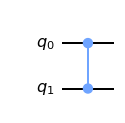

In [5]:
# 制御Z
qc.cz(c,t)
qc.draw()

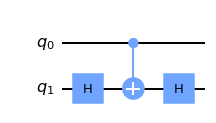

In [6]:
"""等価な制御Zゲート
IBM Qでは、CNOTゲートしか使えない。
以下のように、制御Zゲートと等価な回路を作ることができる
"""
qc = QuantumCircuit(2)
# こちらも制御Z
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw()

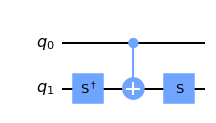

In [7]:
"""同様に、制御Yゲート
"""
qc = QuantumCircuit(2)
# 制御Y
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw()

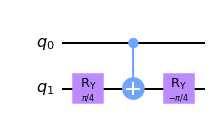

In [8]:
"""同様に、制御Hゲート
"""
qc = QuantumCircuit(2)
# 制御H
qc.ry(pi/4,t)
qc.cx(c,t)
qc.ry(-pi/4,t)
qc.draw()

# 2. 量子ビットのスワップ

In [3]:
a = 0
b = 1

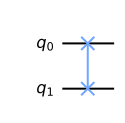

In [4]:
"""SWAPゲート
2つの量子ビット間で状態を移動することで情報の移動を実現します。
これはSWAPゲートによって行われます。
"""
qc = QuantumCircuit(2)
# 量子ビットaとbの状態をスワップする
qc.swap(a,b)
qc.draw()

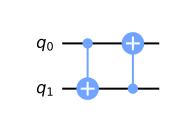

In [5]:
"""
標準のゲートセットを使用してこれを作成する方法を見てみましょう。このためには、いくつかの例を検討する必要があります。

まず、量子ビットaが |1⟩ の状態で、量子ビットbが |0⟩ の状態である場合を見てみましょう。
"""
qc = QuantumCircuit(2)
# aの1をaからbに交換
qc.cx(a,b) # aからbへ1をコピーする
qc.cx(b,a) # bの1を使用してaの状態を0に回転
qc.draw()

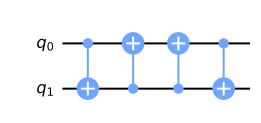

In [6]:
# qをbからaに入れ替える
qc.cx(b,a) # 1をbからaにコピーする
qc.cx(a,b) # aの1を使用してbの状態を0に回転
qc.draw()

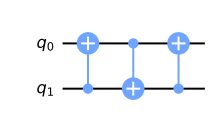

In [7]:
"""
以下は、
* |01> を |10> に
* |10> を |01> に
* 状態|00>と|11>に対しては何もしない
というすべての重ね合わせに対して機能するSWAP回路
"""
qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

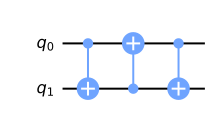

In [9]:
"""
以下も、同等のSWAP回路である。
"""
qc = QuantumCircuit(2)
# 量子ビットaとbの状態を入れ替えます
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
qc.draw()

# 練習問題
腹が減ってるので飛ばす

# 3. 制御回転

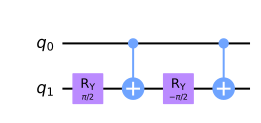

In [3]:
"""
制御 π 回転を単一のCNOTゲートから構築する方法についてをみてきました。 次に、任意の制御回転を構築する方法をみていきます。

まず、y軸を中心とした任意の回転を考えてみましょう。

以下は、
* q0が|0>のとき、Ry(pi/2)とRy(-pi/2)が作用するので、実質作用はない。
* q1が|1>のとき、Ry(pi/2)とRy(pi/2)が作用するので、実質Ry(pi)が作用する。

"""
qc = QuantumCircuit(2)

theta = pi # thetaは何でもよい (任意の値としてpiを選択)
qc.ry(theta/2, 1)
qc.cx(0,1)
qc.ry(-theta/2, 1)
qc.cx(0,1)

qc.draw()

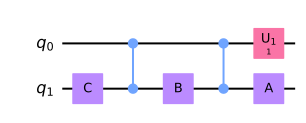

In [10]:
"""
単一量子ビット回転 U の制御バージョンも作ることができます。そのためには、3つの回転A、B、Cと、次のような位相  α  を見つけるだけです。

ABC=I
e^{iα}AZBZC=U
"""
c, t = 0, 1

A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # 回路描写のために任意のalphaを設定

qc = QuantumCircuit(2)
qc.append(C, [t])
qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.u1(alpha,c)

qc.draw()

# 4. トフォリ

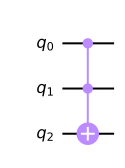

In [11]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# 制御ビットa、b、標的ビットtのトフォリ
qc.ccx(a,b,t)
qc.draw()

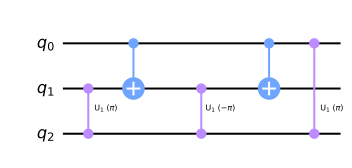

In [13]:
"""
単一量子ビットゲートと2量子ビットゲートからこれを構築する方法を確認したい

2つの制御ビットの各値をみていくことで、両方の制御ビットが1の場合にのみ、Uゲートが標的ビットに適用されることを確認できます。
"""
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2

qc.cu1(theta,b,t) # Controlled-U1 Gate
qc.cx(a,b)
qc.cu1(-theta,b,t)
qc.cx(a,b)
qc.cu1(theta,a,t)

qc.draw()

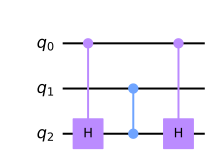

In [14]:
"""
トフォリは、量子コンピューティングでANDゲートを実装するための唯一の方法ではありません。同じ効果があり、相対位相を持つ他のゲートも定義することができます。これらの場合、より少ないCNOTでゲートを実装できます。

例えば、制御アダマールゲートと制御 Z ゲートを使うとします。これらのゲートは、両方とも1つのCNOTで実装できます。これらのゲートから次の回路を作成できます：
"""
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2

qc.ch(a,t)
qc.cz(b,t)
qc.ch(a,t)

qc.draw()

# 5. HとTによる任意の回転

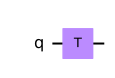

In [15]:
"""
実際の量子回路は、ノイズによって100%確実にθ回転することは難しい。
フォールトトレラントな実装をする必要がある。

フォールトトレラントのスキームでは、通常、2つのみのゲート、 H  とT  を複数適用することによってこれらの回転を実行します。
"""
qc = QuantumCircuit(1)
qc.t(0) # 量子ビット0へTゲートを適用
qc.draw()

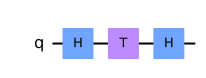

In [16]:
"""
以下では、 H  と T  ゲートの効果が完全であると仮定します。それは、エラー訂正とフォールトトレランスに適した方法で設計できます。

アダマールと前の章で説明した方法を使用すると、Tゲートを使って、x軸を中心に同様の回転を作成できます。
"""
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw()

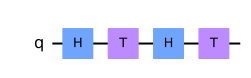

In [17]:
"""
では、2つを組み合わせてみましょう。 Rz(π/4) Rx(π/4)  ゲートを作りましょう。
"""
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw()